In [ ]:
import pandas as pd
import numpy as mp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Import Data

In [ ]:
from google.colab import files
upload = files.upload()

Saving Diabetes.csv to Diabetes.csv


In [ ]:
df = pd.read_csv('Diabetes.csv', sep = ',', index_col=0)
print(df)

     Kehamilan  Glukosa  Tekanan Darah  Ketebalan Kulit  Insulin   BMI  \
0            6      148             72               35        0  33.6   
1            1       85             66               29        0  26.6   
2            8      183             64                0        0  23.3   
3            1       89             66               23       94  28.1   
4            0      137             40               35      168  43.1   
..         ...      ...            ...              ...      ...   ...   
763         10      101             76               48      180  32.9   
764          2      122             70               27        0  36.8   
765          5      121             72               23      112  26.2   
766          1      126             60                0        0  30.1   
767          1       93             70               31        0  30.4   

     DiabetesPedigreeFunction  Umur  Hasil  
0                       0.627    50      1  
1                    

#Data Understanding

In [ ]:
print("Data Shape :", df.shape)

Data Shape : (768, 9)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Kehamilan                 768 non-null    int64  
 1   Glukosa                   768 non-null    int64  
 2   Tekanan Darah             768 non-null    int64  
 3   Ketebalan Kulit           768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Umur                      768 non-null    int64  
 8   Hasil                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [ ]:
df[['Kehamilan','Tekanan Darah','Umur','BMI']].describe()

,Kehamilan,Tekanan Darah,Umur,BMI
count,768.000000,768.000000,768.000000,768.000000
mean,3.845052,69.105469,33.240885,31.992578
std,3.369578,19.355807,11.760232,7.884160
min,0.000000,0.000000,21.000000,0.000000
25%,1.000000,62.000000,24.000000,27.300000
50%,3.000000,72.000000,29.000000,32.000000
75%,6.000000,80.000000,41.000000,36.600000
max,17.000000,122.000000,81.000000,67.100000


In [ ]:
df.Hasil.value_counts()

0    500
1    268
Name: Hasil, dtype: int64

Artinya 0 diagnosis negatif Diabetes, 1 diagnosis positif

Cleaning Data

In [ ]:
df.isnull().sum()

Kehamilan                   0
Glukosa                     0
Tekanan Darah               0
Ketebalan Kulit             0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Umur                        0
Hasil                       0
dtype: int64

Tidak ada data nilai kosong

In [ ]:
df.duplicated().sum()

0

3. EDA Data

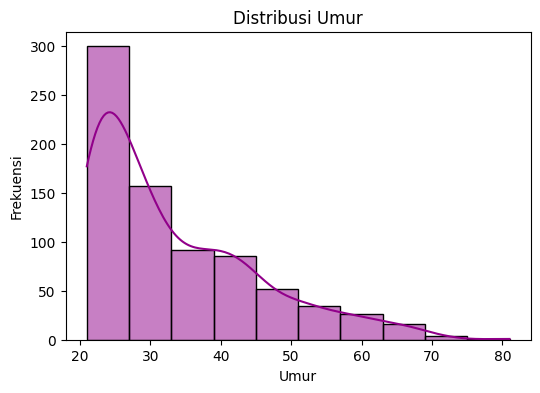

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Umur', bins=10, kde=True, color='#91008a')
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

**PENJELASAN**
1. PLT.FIGURE UKURAN TAMPILAN VISUALISASI, bins ukurannya
2. Menggunakan histogram
3. plt show untuk menampilakn
4. Dapat disimpulkan bahwa jumlah orang yang berusia 20-30 tahun itu memiliki jumlah yang tinggi (lebih mendominasi di umur antara 20-30)

menampilkan visualisasi hasil diagnosis

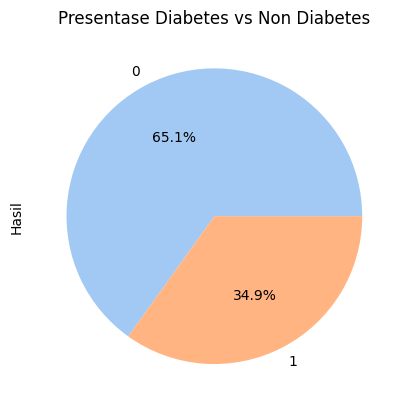

In [ ]:
sns.set_palette('pastel')
df['Hasil'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Presentase Diabetes vs Non Diabetes')
plt.show()

Visualisasi dengan menggunakan diagram pie dengan menampilkan atribut hasil jika dilihat nilai 0 lebih besar daripada 1 yang dimana orang yang menderita diabetes lebih sedikit daripada yang sakit

<ipython-input-59-68ebcf46a663>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hasil', palette='rocket')


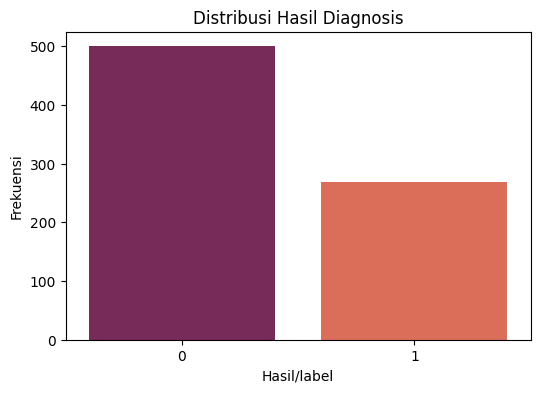

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Hasil', palette='rocket')
plt.title('Distribusi Hasil Diagnosis')
plt.xlabel('Hasil/label')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
df.corr()

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur,Hasil
Kehamilan,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glukosa,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Tekanan Darah,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Ketebalan Kulit,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Umur,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Hasil,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Jika nilai korelasi mendekati atau mencapai 1 berati nilai korelasi itu baik. Kalo nilainya negatif, berati nilai korelasi itu tidak baik atau tidak ada korelasi.

Visualisasi korelasi

<Axes: >

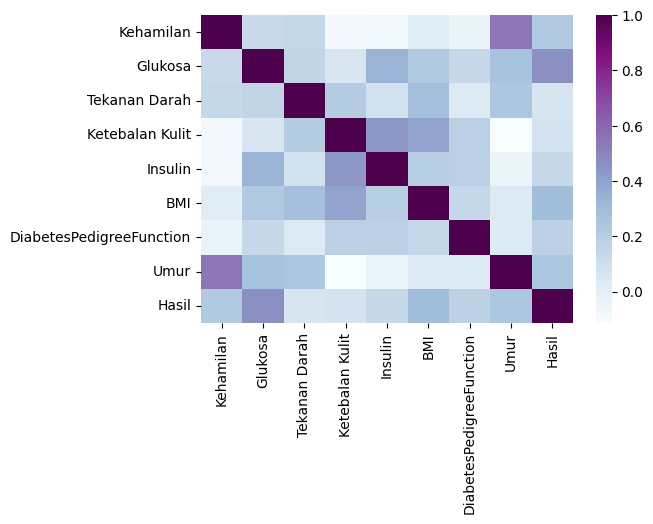

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='BuPu')

Jika dilihat pada gambar diatas yang berawarna gelap itu bernilai 1, hal tersebut dikarenakan terdapat pada atribut yang sama. kalo warnanya pudar berati korelasinya jelek. Fokus pada yang cenderung gelap. Terlihat bahwa pada hubungan antara umur dan kehamilan, insulin dan ketebalan kulit. memiliki korelasi cukup baik


Data Preparasi


Melakukan splitting data

In [ ]:
x = df.drop(columns=['Hasil'])
y = df['Hasil']
print("X :", x.shape)
print("Y :", y.shape)

X : (768, 8)
Y : (768,)


Dilakukan Splitting data yang dimana menghapus kolom hasil karena variabel x itu mau digunakan untuk training model. untuk variabel y berfokus untuk atribut Hasil. untuk atribut x jumlahnya 9

Melakukan standartisasi dari kedua variabel tersebut

In [ ]:
scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)

Memisahkan data testing dan data training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Splitting 20% data testing, dan 80% data Training dan wilayah random statenya 42

Melakukan Modeling dan evaluasi menggunakan SVM

In [ ]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
CLF_acc= accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred))
print("Akurasi SVM : {:.2f}%".format(CLF_acc*100))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

Akurasi SVM : 75.97%


Berdasarkan hasil evaluasi, model yang dibangun tidak memiliki nilai yang buruk

Testing

In [ ]:
new_data = {'Kehamilan':[6],
            'Glukosa' :[150],
            'Tekanan Darah':[72],
            'Ketebalan Kulit':[35],
            'Insulin':[0],
              'BMI':[26.6],
              'DiabetesPedigreeFunction':[0.351],
              'Umur':[31]}
new_data = pd.DataFrame(new_data)
new_data

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur
0,6,150,72,35,0,26.6,0.351,31


Model hasil tidak dimasukan karena label tersebut ditentukan oleh model machine learning yang dibangun

In [ ]:
scaled_new_data = scaler.transform(new_data)
y_pred_new = clf.predict(scaled_new_data)
print("Diagnosis Data Baru", y_pred_new)

Diagnosis Data Baru [0]
